<a href="https://colab.research.google.com/github/massivetriceps/AI/blob/main/week5/kc_house_data_prc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [5]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
X = df.drop(columns=['id', 'date', 'price'])
y = df['price']

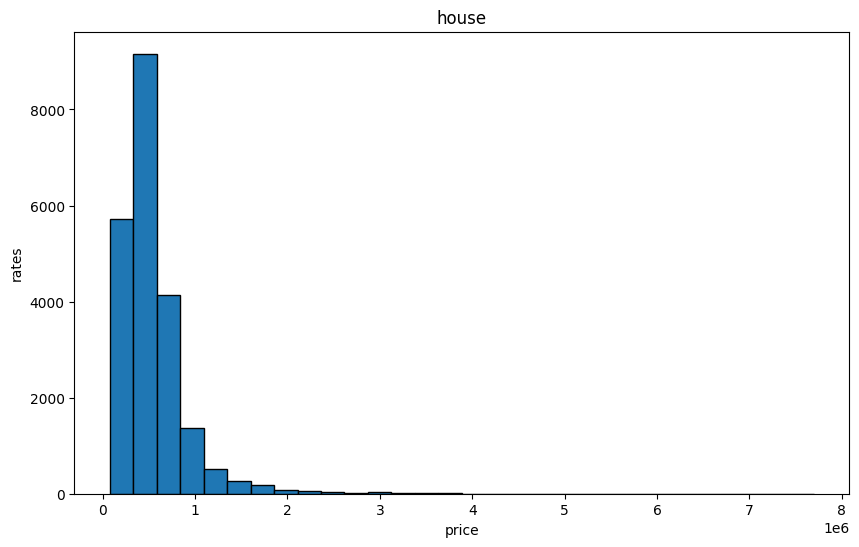

In [7]:
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv')
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.title('house')
plt.xlabel('price')
plt.ylabel('rates')
plt.show()

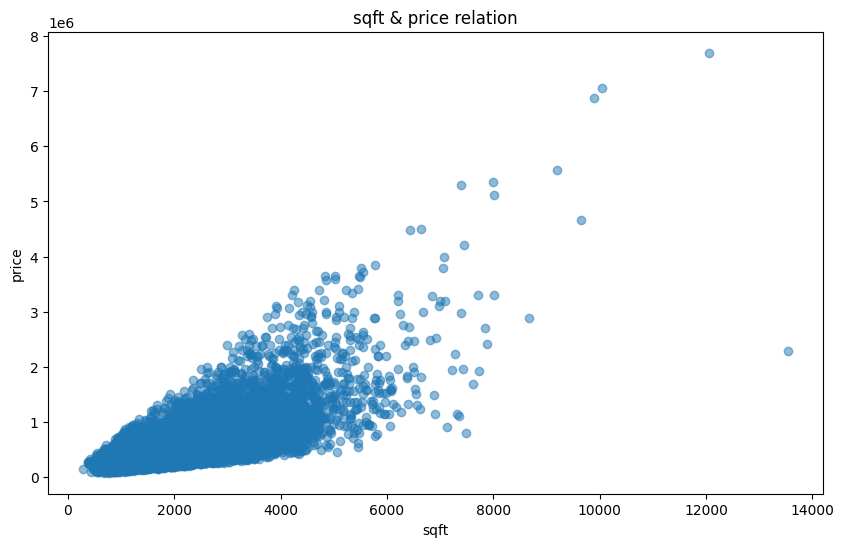

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5)
plt.title('sqft & price relation')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

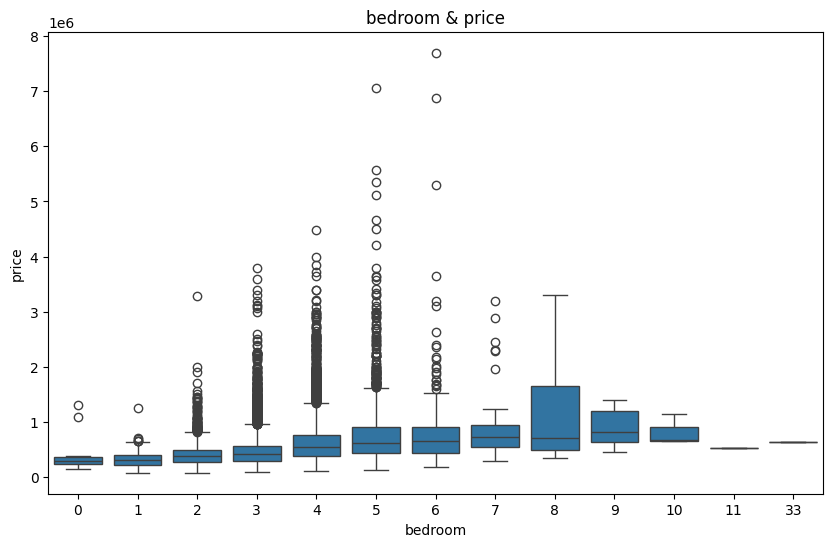

In [10]:
import seaborn as sns

# 침실 수에 따른 가격 분포 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('bedroom & price')
plt.xlabel('bedroom')
plt.ylabel('price')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # 회귀는 출력 1개 (실수)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 427779686400.0000 - mae: 535933.6875 - val_loss: 389551357952.0000 - val_mae: 532435.5625
Epoch 2/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 424900558848.0000 - mae: 536736.4375 - val_loss: 368354230272.0000 - val_mae: 517393.9062
Epoch 3/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 400702341120.0000 - mae: 516775.7812 - val_loss: 320710049792.0000 - val_mae: 481613.0312
Epoch 4/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 326306660352.0000 - mae: 471346.0312 - val_loss: 253071720448.0000 - val_mae: 424013.4688
Epoch 5/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 250697711616.0000 - mae: 409710.3125 - val_loss: 182132260864.0000 - val_mae: 349886.7188
Epoch 6/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 182526984192.0000 - mae: 334763.7188 - val_loss: 126177345536.0000 - val_mae: 276749.0000
Epoch 7/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 125672243200.0000 - mae: 267365.0625 - v

In [ ]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {test_mae:.2f}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38172913664.0000 - mae: 119852.9922
Test MAE: 117593.74
